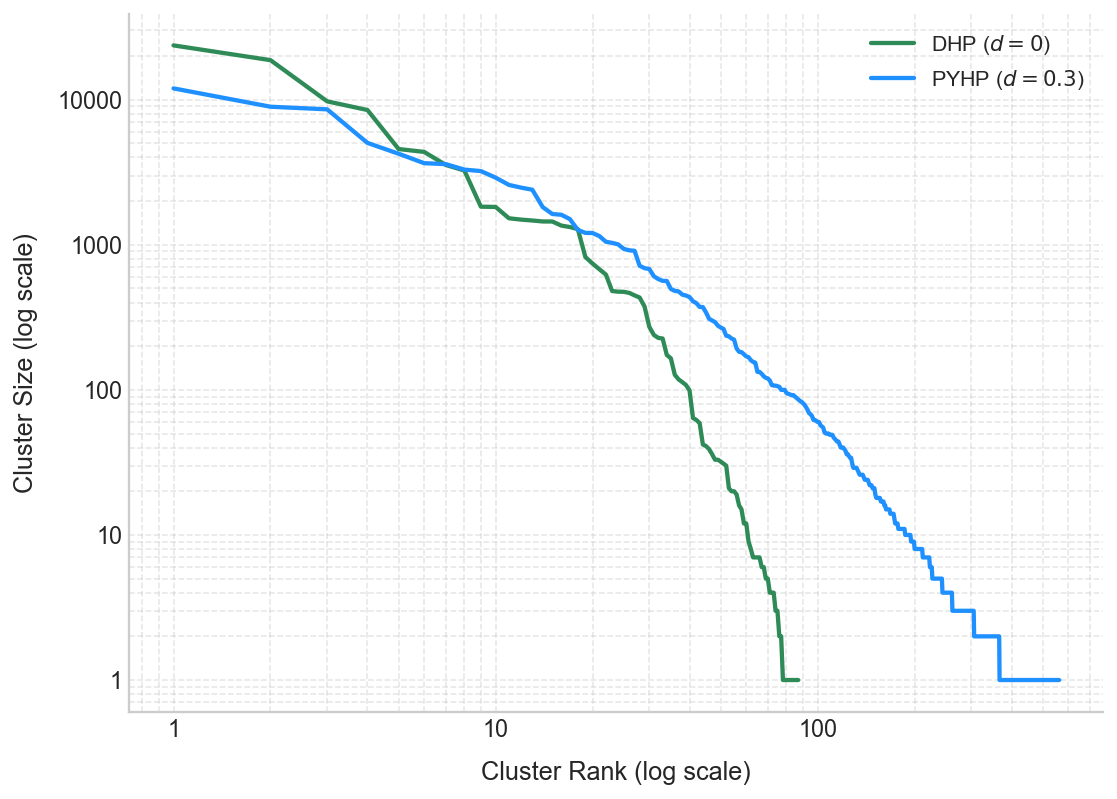

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# -------------------------------
# Simulation Functions
# -------------------------------
def crp(alpha, n_customers):
    """Chinese Restaurant Process (Dirichlet Process: discount = 0)."""
    tables = []
    for _ in range(n_customers):
        if not tables:
            tables.append(1)
        else:
            probs = np.array(tables + [alpha]) / (sum(tables) + alpha)
            choice = np.random.choice(len(probs), p=probs)
            if choice == len(tables):
                tables.append(1)
            else:
                tables[choice] += 1
    return np.array(tables)

def two_param_crp(alpha, discount, n_customers):
    """Two-Parameter Chinese Restaurant Process (Pitman–Yor Process)."""
    tables = []
    for _ in range(n_customers):
        if not tables:
            tables.append(1)
        else:
            probs = np.array([t - discount for t in tables] + [alpha + discount * len(tables)])
            probs = probs / probs.sum()
            choice = np.random.choice(len(probs), p=probs)
            if choice == len(tables):
                tables.append(1)
            else:
                tables[choice] += 1
    return np.array(tables)

# -------------------------------
# Parameters and Simulation
# -------------------------------
alpha = 10
discount = 0.3
n_customers = 100000
np.random.seed(42)

dp_sizes = np.sort(crp(alpha, n_customers))[::-1]
pyp_sizes = np.sort(two_param_crp(alpha, discount, n_customers))[::-1]

# -------------------------------
# Plot Configuration (White Background)
# -------------------------------
plt.figure(figsize=(8,6), facecolor='white')   # Figure background
ax = plt.gca()
ax.set_facecolor('white')                      # Axes background

# Dirichlet Process – green line (matches green dots)
plt.loglog(range(1, len(dp_sizes)+1), dp_sizes,
           linewidth=2.2, linestyle='-', color='seagreen',
           label=r"DHP ($d=0$)")

# Pitman–Yor Process – blue line (matches blue dots)
plt.loglog(range(1, len(pyp_sizes)+1), pyp_sizes,
           linewidth=2.2, linestyle='-', color='dodgerblue',
           label=fr"PYHP ($d={discount}$)")

# Annotation for tail

# Labels and title
plt.xlabel("Cluster Rank (log scale)", fontsize=13, labelpad=10)
plt.ylabel("Cluster Size (log scale)", fontsize=13, labelpad=10)

# Legend and grid
plt.legend(frameon=False, fontsize=11)
plt.grid(True, which="both", linestyle="--", alpha=0.5)
plt.tight_layout()

# Format ticks
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())

# Remove top and right spines for elegance
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Save as high-resolution figure (pure white)
plt.savefig("./results/powerlaw_PYP_vs_DP_white.png", dpi=400, bbox_inches='tight', facecolor='white')
plt.show()
